# Entendimento de Negócio

O mercado de Ciência de Dados está em contante crescimento, é uma área relativamente nova e muitas muito requisitada por qualquer tipo de negócio. Com essa crescente na demanda de funcionários para o cargo, muitas pessoas acabaram migrando para área de dados seduzidos pela sua grante quantidade de benefícios.

Este projeto visa analisar dados e possiveis tendências para vagas de trabalho em Ciência de Dados. Os dados aqui utilizados foram fornecidos pelo Kaggle e contêm campos essenciais para a análise, como cargo, empresa, local da empresa, faixa salarial etc...

**Questões a serem resolvidas:**
- Análise de Tendências: Examinaremos as tendências na demanda por várias habilidades em funções de ciência de dados.
- Análise de Salários: Compararemos faixas salariais para cargos de ciência de dados em empresas e locais.
- Análise de Localização: Identificaremos regiões com alta demanda por profissionais de ciência de dados.
- Análise de Lacuna de Habilidades: Determinaremos as habilidades mais procuradas no setor de ciência de dados.

Para este projeto utilizaremos Python e suas biblitecas para limpeza e transformação dos dados, e o Power BI para visualização dos dados.

____

# Entendimento dos Dados

In [1]:
# importando biliotecas
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

warnings.filterwarnings('ignore')

In [2]:
# importando os dados
data = pd.read_csv(os.getcwd().replace('code', 'data')+'\\raw\\data_science_job.csv')

In [3]:
data.head(10)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,Analysis,EUR,186597,136086,US,MI,CT,Remote,DE,L
1,2020,Statistician (Remote),ML/AI,JPY,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,INR,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,ML/AI,JPY,154130,135242,DE,SE,FT,Hybrid,MX,L
4,2020,Statistician,Data Science,EUR,172312,35156,UK,MI,FT,In-person,UK,S
5,2020,Machine Learning Engineer,Engineering,JPY,36544,68280,CN,MI,FT,Hybrid,DE,M
6,2022,Data Analyst in office,Data Science,JPY,178404,105324,DE,EX,PT,Remote,DE,L
7,2021,Data Scientist (Remote),ML/AI,JPY,187908,90706,UK,EX,CT,Remote,JP,M
8,2022,Data Analyst,NaN,NaN,-44388,171043,UK,NaN,FL,In-person,DE,NaN
9,2022,Statistician (Remote),Engineering,us dolars,31694,73408,DE,EN,CT,Remote,US,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   job_title           5000 non-null   object
 2   job_category        4500 non-null   object
 3   salary_currency     4500 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_in_usd       5000 non-null   int64 
 6   employee_residence  5000 non-null   object
 7   experience_level    4500 non-null   object
 8   employment_type     5000 non-null   object
 9   work_setting        5000 non-null   object
 10  company_location    5000 non-null   object
 11  company_size        4500 non-null   object
dtypes: int64(3), object(9)
memory usage: 468.9+ KB


Podemos notar que há colunas com 500 registros faltando.

In [5]:
# conta a quantidade de dados duplicados
data.duplicated().sum()

0

Não há dados duplicados no dataset.

## Pré-Processamento dos Dados

____

### Coluna Ano

In [6]:
# analisando coluna work_year
data.work_year.value_counts()

work_year
2020    1738
2021    1640
2022    1622
Name: count, dtype: int64

Os dados contidos neste dataset são referentes aos anos de 2020 a 2022.

In [7]:
data.work_year.isnull().sum()

0

Não apresenta valores nulos.

____

### Coluna Cargo

In [8]:
# analisando os títulos de trabalhos
data.job_title.value_counts()

job_title
Data Engineer  in office                372
Data Engineer                           355
Statistician                            354
Data Scientist                          353
Data Analyst  in office                 339
Data Engineer  (Remote)                 338
Data Analyst  (Remote)                  336
Machine Learning Engineer  in office    331
Data Scientist  in office               330
Machine Learning Engineer  (Remote)     327
Statistician  (Remote)                  323
Statistician  in office                 317
Data Scientist  (Remote)                310
Data Analyst                            309
Machine Learning Engineer               306
Name: count, dtype: int64

Aqui podemos notar que alguns títulos de repetem, porém identificando se é presencial ou home office. Como já possuímos uma coluna só com os tipos de trabalho, iremos remover estas identificações e agrupar os titulos únicos. 

In [9]:
data.job_title = data.job_title.str.replace('(', '').str.replace(')', '').str.replace('Remote', '').str.replace('in office', '')

In [10]:
data.job_title.isnull().sum()

0

Não há valores nulos.

____

### Coluna Categoria do Trabalho

In [11]:
# analisando categoria dos trabalhos
data.job_category.value_counts()

job_category
Data Science    1173
ML/AI           1151
Analysis        1108
Engineering     1068
Name: count, dtype: int64

In [12]:
data.job_category.isnull().sum()

500

Há 500 dados faltantes nas cetegorias de trabalho, vamos investigar.

In [13]:
data.loc[data.job_category.isnull()]

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
8,2022,Data Analyst,NaN,NaN,-44388,171043,UK,NaN,FL,In-person,DE,NaN
12,2020,Machine Learning Engineer,NaN,NaN,143057,76456,MX,NaN,FL,In-person,DE,NaN
23,2021,Statistician,NaN,NaN,-112757,124951,DE,NaN,FT,Hybrid,JP,NaN
26,2020,Data Scientist,NaN,NaN,56534,147139,DE,NaN,CT,Hybrid,JP,NaN
29,2022,Data Engineer,NaN,NaN,-142296,174973,DE,NaN,FL,Hybrid,DE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4923,2020,Data Scientist,NaN,NaN,174797,45003,IN,NaN,PT,In-person,UK,NaN
4966,2022,Statistician,NaN,NaN,-85120,119362,US,NaN,FL,Remote,CN,NaN
4975,2022,Machine Learning Engineer,NaN,NaN,53547,109608,IN,NaN,FT,Hybrid,CN,NaN
4995,2020,Machine Learning Engineer,NaN,NaN,179769,179111,UK,NaN,CT,In-person,IN,NaN


Os dados então faltantes não parecem ser erro no registro, eu acredito que possa ser só a falta de especificação de onde os dados foram tirados. Como não há um time de negócios para eu perguntar se esta este ponto é verdadeiro, irei supor que sim, e para solucionar e não deixar esses valores nulos, irei substituí-los pela moda de cada título de trabalho representado.

In [14]:
data

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer,Analysis,EUR,186597,136086,US,MI,CT,Remote,DE,L
1,2020,Statistician,ML/AI,JPY,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,INR,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst,ML/AI,JPY,154130,135242,DE,SE,FT,Hybrid,MX,L
4,2020,Statistician,Data Science,EUR,172312,35156,UK,MI,FT,In-person,UK,S
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2020,Machine Learning Engineer,NaN,NaN,179769,179111,UK,NaN,CT,In-person,IN,NaN
4996,2021,Machine Learning Engineer,NaN,NaN,184642,196373,CN,NaN,FL,Remote,UK,NaN
4997,2022,Machine Learning Engineer,Analysis,GBP,135319,51366,UK,EN,FL,Hybrid,JP,M
4998,2021,Statistician,Data Science,EUR,58037,181817,US,MI,PT,Remote,DE,S


In [15]:
# remove os espaços ao lado direito do final do caractere
data.job_title = data.job_title.str.rstrip()

# substitui espaçoes por caractere _
data.job_title = data.job_title.str.lower().str.replace(' ', '_')

In [16]:
data.loc[data.job_title == 'machine_learning_engineer']

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,machine_learning_engineer,Analysis,EUR,186597,136086,US,MI,CT,Remote,DE,L
2,2022,machine_learning_engineer,ML/AI,INR,61280,153309,UK,MI,CT,Hybrid,CN,L
5,2020,machine_learning_engineer,Engineering,JPY,36544,68280,CN,MI,FT,Hybrid,DE,M
12,2020,machine_learning_engineer,NaN,NaN,143057,76456,MX,NaN,FL,In-person,DE,NaN
24,2020,machine_learning_engineer,Engineering,EUR,38463,56414,IN,EN,FT,Remote,UK,M
...,...,...,...,...,...,...,...,...,...,...,...,...
4991,2020,machine_learning_engineer,ML/AI,JPY,175891,153825,CN,EX,FL,Remote,US,L
4992,2021,machine_learning_engineer,Analysis,INR,37404,37426,JP,SE,FL,Hybrid,CN,M
4995,2020,machine_learning_engineer,NaN,NaN,179769,179111,UK,NaN,CT,In-person,IN,NaN
4996,2021,machine_learning_engineer,NaN,NaN,184642,196373,CN,NaN,FL,Remote,UK,NaN


In [17]:
# Calcular a moda de job_category para cada job_title
modas = data.groupby('job_title')['job_category'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Preencher apenas os valores nulos de job_category
for job_title, moda in modas.items():
    data.loc[(data['job_title'] == job_title) & (data['job_category'].isnull()), 'job_category'] = moda

In [18]:
data.head(15)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,machine_learning_engineer,Analysis,EUR,186597,136086,US,MI,CT,Remote,DE,L
1,2020,statistician,ML/AI,JPY,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,machine_learning_engineer,ML/AI,INR,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,data_analyst,ML/AI,JPY,154130,135242,DE,SE,FT,Hybrid,MX,L
4,2020,statistician,Data Science,EUR,172312,35156,UK,MI,FT,In-person,UK,S
5,2020,machine_learning_engineer,Engineering,JPY,36544,68280,CN,MI,FT,Hybrid,DE,M
6,2022,data_analyst,Data Science,JPY,178404,105324,DE,EX,PT,Remote,DE,L
7,2021,data_scientist,ML/AI,JPY,187908,90706,UK,EX,CT,Remote,JP,M
8,2022,data_analyst,Data Science,NaN,-44388,171043,UK,NaN,FL,In-person,DE,NaN
9,2022,statistician,Engineering,us dolars,31694,73408,DE,EN,CT,Remote,US,S


Nulos substituidos pela moda.

____

Para este projeto, saber em que moeda foi feito o pagamento não é um dos focos da análise, apenas saber o quanto foi pago em dólares importa. Contudo, removeremos as colunas que indicam o salário sem ser em dólar, e a coluna que indica o tipo de moeda em que foi pago.

In [19]:
data = data.drop(columns=['salary_currency', 'salary'])

____

### Colunas Localização da Empresa e Residencia Para o Cargo

In [20]:
# substituindo siglas pelo nome do pais
data.company_location = data.company_location.str.replace('UK', 'reino unido').str.replace('DE', 'alemanha').str.replace('MX', 'mexico').str.replace('IN', 'india').str.replace('CN', 'china').str.replace('US', 'estados unidos').str.replace('JP', 'japao')

# substituindo siglas da coluna de residência do empregado
data.employee_residence = data.employee_residence.str.replace('UK', 'reino unido').str.replace('DE', 'alemanha').str.replace('MX', 'mexico').str.replace('IN', 'india').str.replace('CN', 'china').str.replace('US', 'estados unidos').str.replace('JP', 'japao')

In [21]:
data.company_location.isnull().sum()

0

Nenhum valor nulo para as localizações das empresas.

In [22]:
# analizando residência para o cargo
data.employee_residence.value_counts()

employee_residence
japao             783
india             741
estados unidos    721
alemanha          706
mexico            705
china             674
reino unido       670
Name: count, dtype: int64

In [23]:
data.employee_residence.isnull().sum()

0

____

### Coluna Nível de Experiência

In [24]:
# analisando coluna de nível de experiência
data.experience_level.value_counts()

experience_level
SE    1154
EX    1119
EN    1115
MI    1112
Name: count, dtype: int64

Para ficar mais claro os níveis de experiência, vamos renomea-las.

In [25]:
# renomeando categorias de experência
data.experience_level = data.experience_level.str.replace('SE', 'senior').str.replace('EX', 'executivo').str.replace('EN', 'junior').str.replace('MI', 'pleno')

In [26]:
data.experience_level.isnull().sum()

500

Esses 500 valores nulos, podem ser interpretados como "Não exige nível de experiência", logo substituiremos esse nulos.

In [27]:
data.experience_level.fillna('sem_exp', inplace=True)

____

### Coluna Tipo de Trabalho

In [28]:
# analisando coluna employment_type
data.employment_type.value_counts()

employment_type
PT    1268
FL    1263
FT    1245
CT    1224
Name: count, dtype: int64

Primeiramente para deixar mais fácil o entendimento de cada categoria, vamos traduzi-las com seu significado sem ser por sigla.

In [29]:
data.employment_type = data.employment_type.str.replace('PT', 'meio_periodo').str.replace('FL', 'freelancer').str.replace('FT', 'tempo_integral').str.replace('CT', 'temporario')

In [30]:
data.employment_type.isnull().sum()

0

Não há valores nulos no tipo de emprego.

____

### Analisando coluna de Modelo de Trabalho

In [31]:
# analisando coluna de modelo de trabalho
data.work_setting.value_counts()

work_setting
Hybrid       1721
In-person    1658
Remote       1621
Name: count, dtype: int64

In [32]:
# traduzindo valores
data.work_setting = data.work_setting.str.replace('Hybrid', 'hibrido').str.replace('In-person', 'presencial').str.replace('Remote', 'remoto')

In [33]:
data.work_setting.isnull().sum()

0

Esta coluna também não apresenta valores nulos.

In [34]:
data.head(1)

,work_year,job_title,job_category,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,machine_learning_engineer,Analysis,136086,estados unidos,pleno,temporario,remoto,alemanha,L


____

### Analisando Localização da Empresa

In [35]:
# analisando localização da empresa
data.company_location.value_counts()

company_location
reino unido       789
alemanha          726
mexico            713
india             708
china             697
estados unidos    684
japao             683
Name: count, dtype: int64

In [36]:
data.company_location.isnull().sum()

0

____

#### Analisando Tamanho da Empresa

In [37]:
# analizando tamanho da empresa
data.company_size.value_counts()

company_size
S    1519
M    1517
L    1464
Name: count, dtype: int64

In [38]:
# traduzindo categorias
data.company_size = data.company_size.str.replace('S', 'pequena').str.replace('M', 'media').str.replace('L', 'grande')

In [39]:
data.company_size.isnull().sum()

500

Para imputar os valores nulos das empresas, precisaremos antes ver quais outras colunas possuem correlção com o tamanho da empresa. Depois disso, conseguiremos utilizar a moda condicional para cada grupo de empresas.

In [40]:
data

,work_year,job_title,job_category,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,machine_learning_engineer,Analysis,136086,estados unidos,pleno,temporario,remoto,alemanha,grande
1,2020,statistician,ML/AI,67982,japao,executivo,freelancer,remoto,india,media
2,2022,machine_learning_engineer,ML/AI,153309,reino unido,pleno,temporario,hibrido,china,grande
3,2022,data_analyst,ML/AI,135242,alemanha,senior,tempo_integral,hibrido,mexico,grande
4,2020,statistician,Data Science,35156,reino unido,pleno,tempo_integral,presencial,reino unido,pequena
...,...,...,...,...,...,...,...,...,...,...
4995,2020,machine_learning_engineer,Analysis,179111,reino unido,sem_exp,temporario,presencial,india,NaN
4996,2021,machine_learning_engineer,Analysis,196373,china,sem_exp,freelancer,remoto,reino unido,NaN
4997,2022,machine_learning_engineer,Analysis,51366,reino unido,junior,freelancer,hibrido,japao,media
4998,2021,statistician,Data Science,181817,estados unidos,pleno,meio_periodo,remoto,alemanha,pequena


In [41]:
data.company_size.value_counts()

company_size
pequena    1519
media      1517
grande     1464
Name: count, dtype: int64

In [42]:
print(f'Média de salários pagos por empresas grandes: {data[data["company_size"] == "grande"].groupby("company_size")["salary_in_usd"].mean()}')
print('_')
print(f'Média de salários pagos por empresas médias: {data[data["company_size"] == "media"].groupby("company_size")["salary_in_usd"].mean()}')
print('_')
print(f'Média de salários pagos por empresas pequenas: {data[data["company_size"] == "pequena"].groupby("company_size")["salary_in_usd"].mean()}')

Média de salários pagos por empresas grandes: company_size
grande    114895.802596
Name: salary_in_usd, dtype: float64
_
Média de salários pagos por empresas médias: company_size
media    113401.736981
Name: salary_in_usd, dtype: float64
_
Média de salários pagos por empresas pequenas: company_size
pequena    113011.419355
Name: salary_in_usd, dtype: float64


A média de salário pago parece não variar muito de acordo com o tamanho da empresa, logo não parece ser uma boa métrica para usarmos na substituição dos valores nulos. 

Para cada empresa que não tiver o tamanho registrado, utilizaremos a moda do tamanho das empresas do seu país, e para vermos melhor, segue o gráfico:

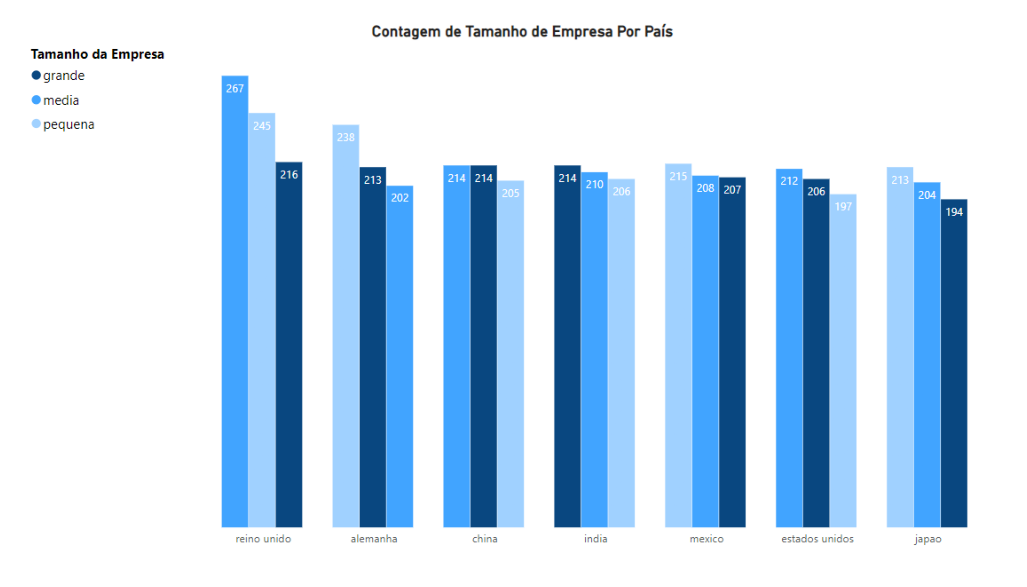

In [43]:
plt.figure(figsize=(13,9))
img = mpimg.imread(os.getcwd().replace('code', 'docs')+'\\tamanho_empresas.png')
plt.imshow(img)
plt.axis('off')
plt.show()

**Reino Unido** - Empresas de tamanho médio.

**Alemanha** - Pequenas Empresas.

**China** - Grandes e médias.

**India** - Grandes.

**México** - Pequenas.

**Estados Unidos** - Médias.

**Japão** - Grandes.


In [44]:
# calcula a moda do tamanho da empresa por pais
moda_pais = data.groupby('company_location')['company_size'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# atribuindo valores nulos do tamanho das empresas
data['company_size'] = data.apply(
    lambda row: moda_pais[row['company_location']] if pd.isnull(row['company_size']) else row['company_size'], axis=1
)

____

In [45]:
# exportando dataset
path = 'c:\\Users\\God\\Desktop\\DieGod\\Projetos\\Data_Science_Job_Analysis\\data\\processed\\data2.csv'
data.to_csv(path, index=False)

____